In [1]:
import pandas as pd

police_complaints = pd.read_csv('/Users/gracetrainor/Desktop/dsc106/project2/allegations.csv')
police_complaints

white_officers = police_complaints[police_complaints['mos_ethnicity'] == 'White']#.groupby('complainant_ethnicity').count()
white_officers

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
6,10014,Malachy,Sullivan,078 PCT,4143,33969,11,2015,2,2016,...,43,White,Male,34.0,Offensive Language,Sexual orientation,78.0,PD suspected C/V of violation/crime - street,Summons - other violation/crime,Substantiated (Formalized Training)
10,10018,Shmuel,Tenenbaum,078 PCT,4518,36984,4,2017,11,2017,...,35,Refused,Male,30.0,Abuse of Authority,Refusal to provide name/shield number,78.0,Other,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33353,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Discourtesy,Word,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33354,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Interference with recording,66.0,Moving violation,Moving violation summons issued,Unsubstantiated
33355,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Search (of person),66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)
33356,9992,Tomasz,Pulawski,078 PCT,2642,35671,8,2016,2,2017,...,36,Asian,Male,21.0,Abuse of Authority,Vehicle search,66.0,Moving violation,Moving violation summons issued,Substantiated (Formalized Training)


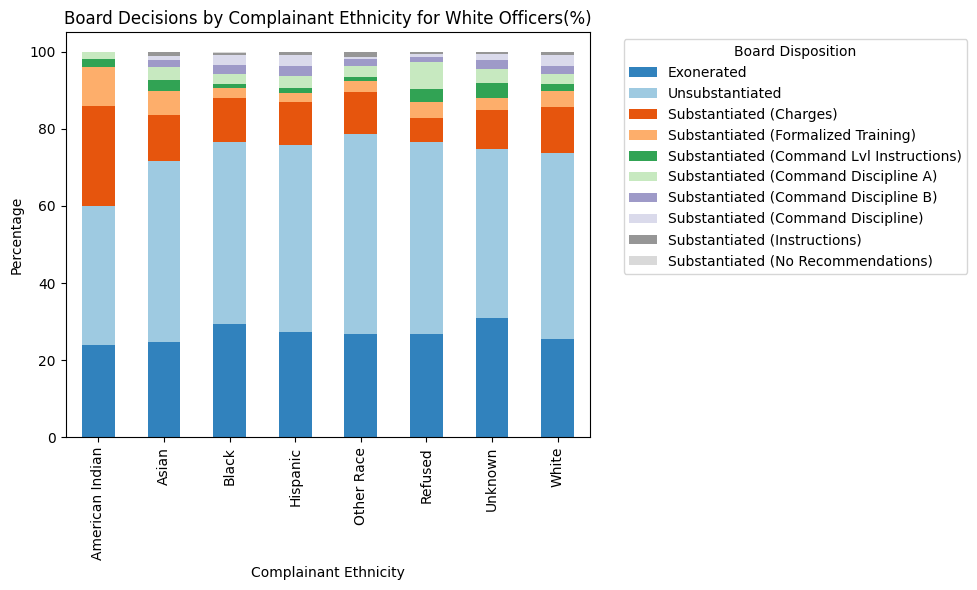

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


disposition_counts = white_officers.groupby(['complainant_ethnicity', 'board_disposition']).size().unstack(fill_value=0)
disposition_percent = disposition_counts.div(disposition_counts.sum(axis=1), axis=0) * 100

order = ['Exonerated', 'Unsubstantiated','Substantiated (Charges)', 'Substantiated (Formalized Training)',
       'Substantiated (Command Lvl Instructions)',
        'Substantiated (Command Discipline A)',
       'Substantiated (Command Discipline B)',
       'Substantiated (Command Discipline)',
       'Substantiated (Instructions)',
       'Substantiated (No Recommendations)',
       'Substantiated (MOS Unidentified)']
disposition_counts = disposition_counts.reindex(columns=[col for col in order if col in disposition_counts.columns])

disposition_percent = disposition_counts.div(disposition_counts.sum(axis=1), axis=0) * 100

custom_colors = {
    'Exonerated': '#a6cee3',                           # Light blue
    'Unsubstantiated': '#9fc9e1',                      # Slightly darker blue

    'Substantiated (Charges)': '#fb9a99',              # Soft red
    'Substantiated (Formalized Training)': '#fca285',  # Coral
    'Substantiated (Command Lvl Instructions)': '#fdbf6f',  # Orange
    'Substantiated (Command Discipline A)': '#fdd49e',      # Light orange
    'Substantiated (Command Discipline B)': '#fdbf6f',      # Orange (reused for similar outcomes)
    'Substantiated (Command Discipline)': '#fcae91',        # Light salmon
    'Substantiated (Instructions)': '#fbb4ae',              # Light pink
    'Substantiated (No Recommendations)': '#f781bf',        # Soft magenta
    'Substantiated (MOS Unidentified)': '#e31a1c'           # Bold red
}


disposition_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20c')
plt.title('Board Decisions by Complainant Ethnicity for White Officers(%)')
plt.ylabel('Percentage')
plt.xlabel('Complainant Ethnicity')
plt.legend(title='Board Disposition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [3]:
df = (
    police_complaints
    .groupby(['complainant_ethnicity', 'board_disposition'])
    .size()
    .reset_index(name='count')
)

df['percent'] = df.groupby('complainant_ethnicity')['count'].transform(lambda x: x / x.sum() * 100)

fig = px.bar(
    df,
    x='complainant_ethnicity',
    y='percent',
    color='board_disposition',
    barmode='stack',
    title='Complaint Outcomes by Complainant Ethnicity'
)
fig.show()


NameError: name 'px' is not defined